In [481]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [482]:
# make_regression - генератор данных для линейной регрессии
# n_samples - X - кол-во исследований (строк)
# n_features - X - кол-во параметров (столбцов) 
# n_targets - y - кол-во параметров (столбцов) target
# random_state - число-начало для псевдослучайной генерации

X, y = make_regression(n_samples = 20, n_features = 5, n_targets = 1, random_state = 42)
X, y

(array([[ 1.53803657, -0.03582604,  0.36139561,  1.56464366, -2.6197451 ],
        [-1.15099358,  0.37569802,  0.11092259, -0.60063869, -0.29169375],
        [-1.01283112,  0.31424733, -0.56228753, -0.90802408, -1.4123037 ],
        [-0.38508228, -0.676922  ,  0.32408397,  0.61167629,  1.03099952],
        [ 0.08704707, -0.29900735,  0.8219025 ,  0.09176078, -1.98756891],
        [ 0.29612028,  0.26105527, -1.46351495,  0.00511346, -0.23458713],
        [-0.18565898, -1.10633497, -0.47917424, -1.19620662,  0.81252582],
        [-0.46063877,  1.05712223, -0.71984421,  0.34361829, -1.76304016],
        [ 0.2088636 , -1.95967012, -1.22084365, -1.32818605,  0.19686124],
        [ 0.91540212,  0.32875111, -0.50175704, -0.5297602 ,  0.51326743],
        [-0.2257763 ,  0.0675282 ,  1.46564877, -1.42474819, -0.54438272],
        [-0.1382643 ,  0.64768854,  0.49671415,  1.52302986, -0.23415337],
        [-0.46572975,  0.24196227, -0.46341769, -1.91328024, -1.72491783],
        [ 1.57921282,  0.

In [483]:
N = [[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]]
N
X = np.hstack([N, X])
X

array([[ 1.        ,  1.53803657, -0.03582604,  0.36139561,  1.56464366,
        -2.6197451 ],
       [ 1.        , -1.15099358,  0.37569802,  0.11092259, -0.60063869,
        -0.29169375],
       [ 1.        , -1.01283112,  0.31424733, -0.56228753, -0.90802408,
        -1.4123037 ],
       [ 1.        , -0.38508228, -0.676922  ,  0.32408397,  0.61167629,
         1.03099952],
       [ 1.        ,  0.08704707, -0.29900735,  0.8219025 ,  0.09176078,
        -1.98756891],
       [ 1.        ,  0.29612028,  0.26105527, -1.46351495,  0.00511346,
        -0.23458713],
       [ 1.        , -0.18565898, -1.10633497, -0.47917424, -1.19620662,
         0.81252582],
       [ 1.        , -0.46063877,  1.05712223, -0.71984421,  0.34361829,
        -1.76304016],
       [ 1.        ,  0.2088636 , -1.95967012, -1.22084365, -1.32818605,
         0.19686124],
       [ 1.        ,  0.91540212,  0.32875111, -0.50175704, -0.5297602 ,
         0.51326743],
       [ 1.        , -0.2257763 ,  0.0675282 ,  1.

In [484]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [485]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    e = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 100) == 0:
            print(i, W, err)
            e.append(err)
    return W, err,e

In [486]:
W, err,e = eval_model(X.T, y, iterations=45000, alpha=1e-4)

450 [-2.53659213  1.75761234 -1.23658241  2.32774748  2.88255437  9.44875477] 10613.615770105938
900 [-5.86256603  2.74916349 -1.77320523  4.07207628  5.87791889 18.10571961] 8402.35561290872
1350 [-8.52236682  3.73221293 -2.11922219  5.76943416  8.56250781 25.67973549] 6718.504066866159
1800 [-10.62133081   4.69894407  -2.30829408   7.41532982  10.97130155
  32.32029505] 5427.356567564888
2250 [-12.24914271   5.64326137  -2.36880133   9.00660622  13.13505169
  38.15545716] 4429.686377823451
2700 [-13.48211821   6.56050409  -2.32464252  10.54119961  15.0808207
  43.2949599 ] 3652.275295233269
3150 [-14.38515546   7.4472037   -2.19591407  12.01793747  16.83245009
  47.8328796 ] 3040.9866646222486
3600 [-15.01340321   8.30087844  -1.99948846  13.43636913  18.41096669
  51.84990236] 2555.6962892270635
4050 [-15.41368696   9.11985976  -1.74950611  14.79662419  19.8349355
  55.41526438] 2166.581327229777
4500 [-15.62572794   9.90314562  -1.45779362  16.09929431  21.12076634
  58.58840962] 1

41850 [-0.28756955 22.17387221 11.4974867  41.33810947 33.86716125 93.89623484] 0.3363938133585859
42300 [-0.27195121 22.17591665 11.51721265 41.35712685 33.86485752 93.9151023 ] 0.3061570500449041
42750 [-0.25715705 22.17781474 11.53614413 41.37522359 33.86254942 93.9330611 ] 0.2786760738740161
43200 [-0.24314422 22.17957755 11.55431314 41.39244496 33.86024247 93.95015544] 0.25369633128315183
43650 [-0.22987209 22.18121535 11.57175038 41.40883399 33.85794165 93.96642733] 0.23098709150945437
44100 [-0.21730211 22.18273762 11.58848532 41.42443156 33.85565143 93.98191673] 0.2103391881550869
44550 [-0.20539771 22.18415317 11.60454622 41.43927653 33.85337583 93.99666164] 0.19156297763298374
45000 [-0.19412422 22.18547011 11.61996022 41.45340584 33.85111846 94.01069816] 0.17448649339118716


In [487]:
# e

In [488]:
def eval_sgd_model(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    e1 = []
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))

        if i % (iterations / 100) == 0:
            print(i, W, err)
            e1.append(err)
    return W, err, e1

In [489]:
W1, err1,e1 =eval_sgd_model(X.T, y, iterations=45000, qty_in_batch=1, alpha=1e-4)

450 [-3.7017242  -0.74988983 -2.38572731  1.28503588  2.38755807 10.0489755 ] 9634.300298141956
900 [-6.87855161  0.4024262  -2.82779861  3.08606788  5.43395794 18.55613605] 6899.022040104368
1350 [-9.40894609  1.53481624 -3.08950829  4.83533805  8.16626394 26.00572699] 4929.229080869843
1800 [-11.39547998   2.64038782  -3.2032198    6.52891156  10.61954724
  32.54334612] 3512.940446594487
2250 [-12.92547335   3.71388151  -3.19619277   8.16411427  12.82467038
  38.29373588] 2496.4367570832983
2700 [-14.07321823   4.75139448  -3.0913567    9.73930193  14.80882119
  43.36381138] 1768.3326113012754
3150 [-14.90188011   5.75014658  -2.90796937  11.25366679  16.59597625
  47.84524697] 1247.9869716732298
3600 [-15.46512365   6.7082825   -2.66217682  12.70707576  18.20730345
  51.81668586] 877.0731646784461
4050 [-15.80850248   7.62470478  -2.3674896   14.09993527  19.66151175
  55.34562761] 613.4496260812787
4500 [-15.97064726   8.49893293  -2.03518762  15.43307865  20.97515552
  58.4900407 

37350 [-0.47719055 22.10662147 11.22752065 41.03770329 33.92594351 93.64389502] 0.0003799174673563979
37800 [-0.45092899 22.11233112 11.25809144 41.07060927 33.92307298 93.67511538] 0.00028165210921245757
38250 [-0.42606442 22.11766241 11.28743062 41.10193392 33.92012673 93.70481831] 0.00020432832499074104
38700 [-0.40252392 22.12264205 11.31558797 41.13175454 33.91711866 93.73307835] 0.00014430201136587635
39150 [-0.38023831 22.12729486 11.34261126 41.1601446  33.91406143 93.75996632] 9.847656843504044e-05
39600 [-0.35914197 22.1316439  11.36854629 41.18717396 33.91096656 93.78554951] 6.422956667415863e-05
40050 [-0.33917269 22.1357106  11.393437   41.21290901 33.90784453 93.80989186] 3.9348246024459035e-05
40500 [-0.32027144 22.13951487 11.41732554 41.23741288 33.90470485 93.83305414] 2.19729110321612e-05
40950 [-0.30238225 22.14307519 11.44025234 41.26074559 33.90155612 93.85509411] 1.0547365076841448e-05
41400 [-0.28545205 22.14640874 11.4622562  41.28296417 33.89840614 93.87606667

In [490]:
# e1

In [491]:
q = [e*100 for i in e]

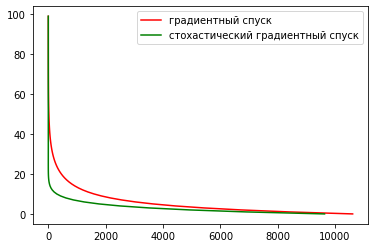

In [492]:
plt.plot(e, range(len(e)), 'r', label="градиентный спуск")
plt.plot(e1, range(len(e1)), color='green', label="стохастический градиентный спуск")
plt.legend()

На данном графике мы можем наблюдать, что модель построенная с помощью стахастическиго градиентного спуска быстрее достигает "плато", т.е. обладает лучшей скоростью сходимости

In [493]:
# Стандартизация данных
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [494]:
X1 = X.copy()
calc_std_feat(X1)

array([[ 0.99793623,  1.58163279, -0.12579427,  0.30513724,  1.61049787,
        -2.92899534],
       [ 0.99793623, -1.33559951,  0.32065341,  0.03340805, -0.73853925,
        -0.40337597],
       [ 0.99793623, -1.18571202,  0.25398777, -0.69693345, -1.07201062,
        -1.61908549],
       [ 0.99793623, -0.50468983, -0.82129627,  0.26465918,  0.57665777,
         1.0315665 ],
       [ 0.99793623,  0.00750635, -0.41131023,  0.80472465,  0.01262009,
        -2.24317008],
       [ 0.99793623,  0.23432238,  0.19628161, -1.67464273, -0.08138048,
        -0.34142305],
       [ 0.99793623, -0.28834265, -1.287151  , -0.60676682, -1.38464953,
         0.79455222],
       [ 0.99793623, -0.58665836,  1.05990608, -0.86786104,  0.28585127,
        -1.99958688],
       [ 0.99793623,  0.13966073, -2.21290368, -1.41137735, -1.52782927,
         0.1266398 ],
       [ 0.99793623,  0.90615902,  0.2697224 , -0.6312661 , -0.66164572,
         0.46989753],
       [ 0.99793623, -0.33186449, -0.01366896,  1.

In [495]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    e2 = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
            e2.append(err)
    return W, err, e2

In [503]:
W2, err2, e2 = eval_model_reg2(X.T, y, iterations=45000, alpha=1e-4, lambda_=1e-4)

4500 [-16.02747615   9.53542701  -0.78841705  16.59200514  20.95286389
  58.66748019] 1837.9335038537465
9000 [-12.93438381  15.69077447   2.64540765  26.53880589  28.6806162
  77.18262042] 505.5835302189263
13500 [-8.36703438 19.00170364  5.68417995 32.61109245 31.75018651 84.85614081] 170.01869978099631
18000 [-5.08375273 20.67155073  7.80766478 36.25423245 33.0272637  88.76660161] 60.0270718588107
22500 [-3.02144313 21.48595589  9.22209556 38.43589978 33.56085584 90.97851301] 21.680619929912872
27000 [-1.77967589 21.87406625 10.1563261  39.74450213 33.7732033  92.28433084] 7.970132122020215
31500 [-1.04343279 22.0553234  10.77365088 40.53103883 33.84568403 93.0684112 ] 2.9774434438346913
36000 [-0.60972114 22.13829399 11.18222149 41.00473407 33.85905746 93.54281508] 1.1296915751216265
40500 [-0.35511456 22.17552261 11.45292331 41.2906256  33.84962032 93.83111912] 0.4353471822091026
45000 [-0.2060697  22.19195375 11.63235822 41.46360668 33.83338968 94.0069004 ] 0.17050390706044052


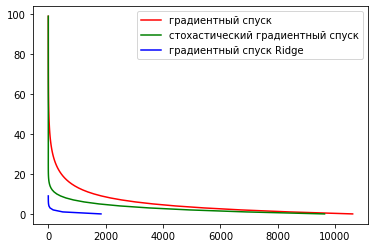

In [504]:
plt.plot(e, range(len(e)), 'r', label="градиентный спуск")
plt.plot(e1, range(len(e1)), color='green', label="стохастический градиентный спуск")
plt.plot(e2, range(len(e2)), color='blue', label="градиентный спуск Ridge")
plt.legend()